## Getting Word Cloud

**Author**: Thodoris Petropoulos

**Label**: Evaluating Models

### Scope
The scope of this notebook is to provide instructions on how to get the Word Cloud of a specific model using the Python API.

### Background
The word cloud is a type of insight available for some text-processing models for datasets containing text columns. You can get information about how the appearance of each ngram (word or sequence of words) in the text field affects the predicted target value.

This example will show you how to obtain word cloud data and visualize it, similar to how DataRobot visualizes the word cloud in the “Model Insights” tab interface.

### Requirements

- Python version 3.7.3
-  DataRobot API version 2.19.0. 
Small adjustments might be needed depending on the Python version and DataRobot API version you are using.

Full documentation of the Python package can be found here: https://datarobot-public-api-client.readthedocs-hosted.com

It is assumed you already have a DataRobot <code>Project</code> object and a DataRobot <code>Model</code> object.

#### Import Libraries

In [11]:
import datarobot as dr
from colour import Color
import wordcloud
import numpy as np
from datarobot.errors import ClientError
import matplotlib.pyplot as plt

#### Define some Colors

In [6]:
colors = [Color('#2458EB')]
colors.extend(list(Color('#2458EB').range_to(Color('#31E7FE'), 81))[1:])
colors.extend(list(Color('#31E7FE').range_to(Color('#8da0a2'), 21))[1:])
colors.extend(list(Color('#a18f8c').range_to(Color('#ffad9e'), 21))[1:])
colors.extend(list(Color('#ffad9e').range_to(Color('#d80909'), 81))[1:])
webcolors = [c.get_web() for c in colors]

#### Requesting Word Cloud
Request word cloud with <code>get_word_cloud</code> method.

In [7]:
models = project.get_models()

model_with_word_cloud = None
for model in models:
    try:
        model.get_word_cloud()
        model_with_word_cloud = model
        break
    except ClientError as e:
        if e.json['message'] and 'No word cloud data' in e.json['message']:
            pass
        else:
            raise

model_with_word_cloud

Model('Auto-Tuned Word N-Gram Text Modeler using token occurrences - diag_1_desc')

In [8]:
wc = model_with_word_cloud.get_word_cloud(exclude_stop_words=True)

#### Plotting Word Cloud

In [9]:
def word_cloud_plot(wc, font_path=None):
    # Stopwords usually dominate any word cloud, so we will filter them out
    dict_freq = {wc_word['ngram']: wc_word['frequency']
                 for wc_word in wc.ngrams
                 if not wc_word['is_stopword']}
    dict_coef = {wc_word['ngram']: wc_word['coefficient']
                 for wc_word in wc.ngrams}

    def color_func(*args, **kwargs):
        word = args[0]
        palette_index = int(round(dict_coef[word] * 100)) + 100
        r, g, b = colors[palette_index].get_rgb()
        return 'rgb({:.0f}, {:.0f}, {:.0f})'.format(int(r * 255),
                                                    int(g * 255),
                                                    int(b * 255))

    wc_image = wordcloud.WordCloud(stopwords=set(),
                                   width=1024, height=1024,
                                   relative_scaling=0.5,
                                   prefer_horizontal=1,
                                   color_func=color_func,
                                   background_color=(0, 10, 29),
                                   font_path=font_path).fit_words(dict_freq)
    plt.imshow(wc_image, interpolation='bilinear')
    plt.axis('off')

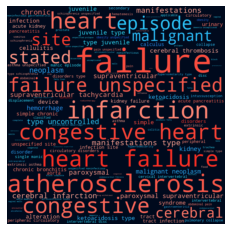

In [12]:
word_cloud_plot(wc)